# F1Ops Data Ingestion & Exploration

This notebook demonstrates loading and exploring F1 calendar data for the European season.

**Version**: 0.1 (Feb 2020)
**Data**: 2010-2019 seasons

In [1]:
import sys
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from f1ops.data_loader import get_available_seasons, get_european_races, load_circuits
from f1ops.config import EUROPEAN_COUNTRIES

%matplotlib inline
sns.set_style('whitegrid')

## 1. Load Available Seasons

In [2]:
seasons = get_available_seasons()
print(f"Available seasons: {seasons}")
print(f"Total seasons: {len(seasons)}")

Available seasons: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Total seasons: 11


## 2. Load Circuits Database

In [3]:
circuits_df = load_circuits()
print(f"Total European circuits: {len(circuits_df)}")
circuits_df.head(10)

Total European circuits: 9


,name,city,country,latitude,longitude
0,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.2611
1,Circuit de Monaco,Monte Carlo,Monaco,43.7347,7.4206
2,Autodromo Nazionale di Monza,Monza,Italy,45.6205,9.2814
3,Hungaroring,Budapest,Hungary,47.5818,19.2511
4,Spa-Francorchamps,Spa,Belgium,50.4372,5.9714
5,Silverstone Circuit,Silverstone,UK,52.0786,-1.0169
6,Red Bull Ring,Spielberg,Austria,47.2197,14.7647
7,Hockenheimring,Hockenheim,Germany,49.3278,8.5656
8,Nürburgring,Nürburg,Germany,50.3356,6.9475


## 3. Analyze a Sample Season (2019)

In [4]:
races_2019 = get_european_races(2019)
print(f"European races in 2019: {len(races_2019)}")

# Convert to DataFrame for analysis
races_data = []
for race in races_2019:
    races_data.append({
        'round': race.round,
        'race_name': race.race_name,
        'circuit': race.circuit.name,
        'city': race.circuit.city,
        'country': race.circuit.country,
        'date': race.race_date,
        'latitude': race.circuit.latitude,
        'longitude': race.circuit.longitude
    })

df_2019 = pd.DataFrame(races_data)
df_2019

European races in 2019: 8


,round,race_name,circuit,city,country,date,latitude,longitude
0,5,Spanish Grand Prix,Circuit de Barcelona-Catalunya,Montmeló,Spain,2019-05-12,41.5700,2.2611
1,6,Monaco Grand Prix,Circuit de Monaco,Monte Carlo,Monaco,2019-05-26,43.7347,7.4206
2,8,French Grand Prix,Circuit Paul Ricard,Le Castellet,France,2019-06-23,43.2506,5.7919
3,9,Austrian Grand Prix,Red Bull Ring,Spielberg,Austria,2019-06-30,47.2197,14.7647
4,11,German Grand Prix,Hockenheimring,Hockenheim,Germany,2019-07-28,49.3278,8.5656
5,12,Hungarian Grand Prix,Hungaroring,Budapest,Hungary,2019-08-04,47.5818,19.2511
6,13,Belgian Grand Prix,Spa-Francorchamps,Spa,Belgium,2019-09-01,50.4372,5.9714
7,14,Italian Grand Prix,Autodromo Nazionale di Monza,Monza,Italy,2019-09-08,45.6205,9.2814


## 4. Geographic Distribution

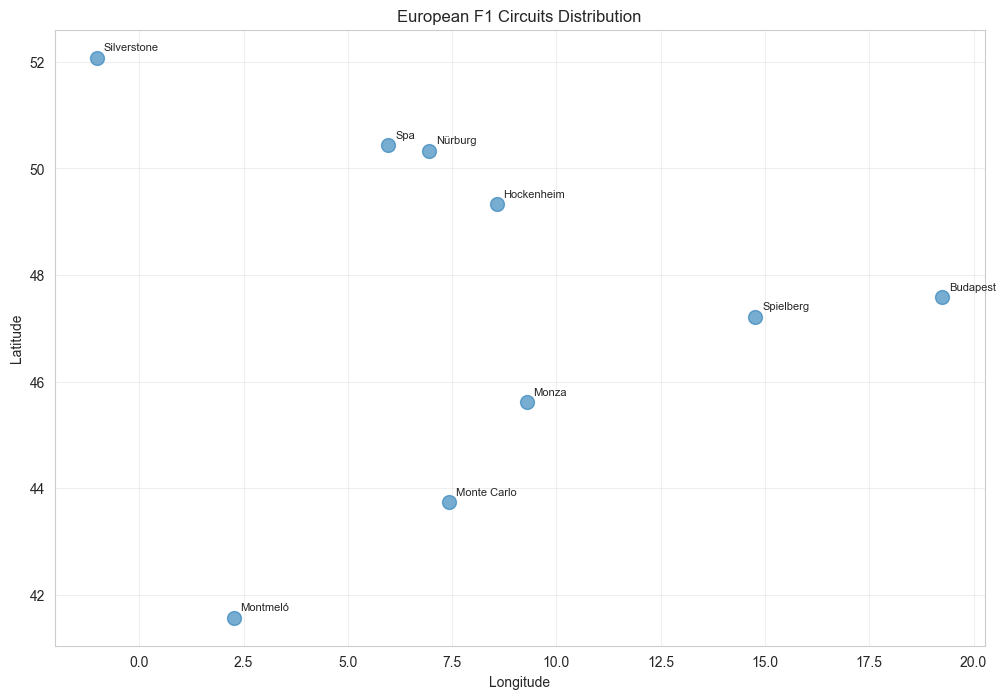

In [5]:
# Plot circuits on a simple scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(circuits_df['longitude'], circuits_df['latitude'], s=100, alpha=0.6)

for idx, row in circuits_df.iterrows():
    plt.annotate(row['city'], (row['longitude'], row['latitude']), 
                fontsize=8, xytext=(5, 5), textcoords='offset points')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('European F1 Circuits Distribution')
plt.grid(True, alpha=0.3)
plt.show()

## 5. Races by Country

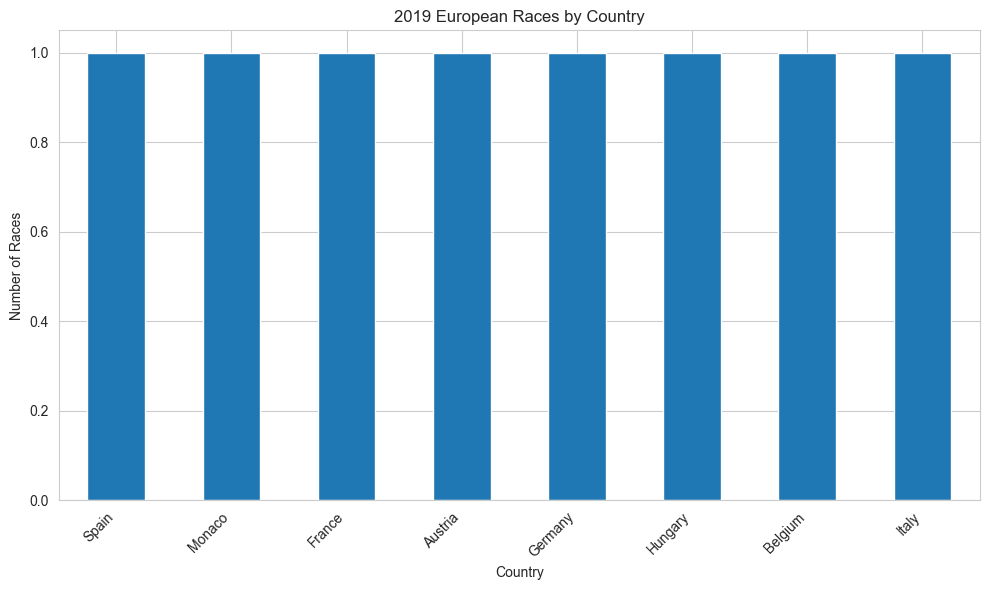

In [6]:
country_counts = df_2019['country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('2019 European Races by Country')
plt.xlabel('Country')
plt.ylabel('Number of Races')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Seasonal Patterns Across Years

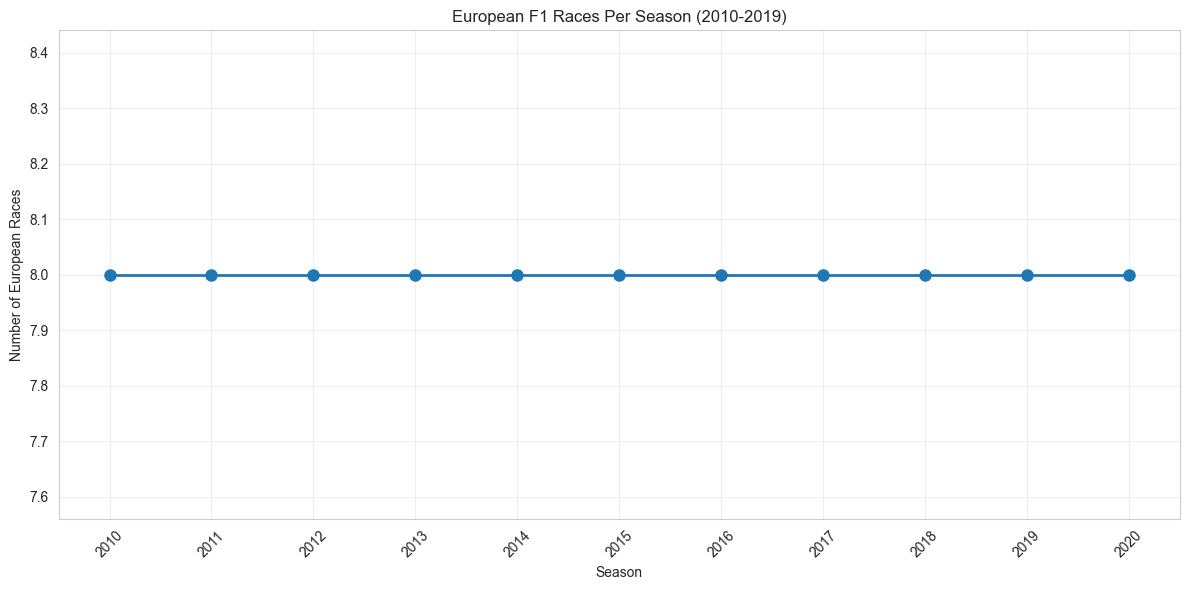

In [7]:
# Analyze number of European races per year
races_per_year = {}
for season in seasons:
    races = get_european_races(season)
    races_per_year[season] = len(races)

plt.figure(figsize=(12, 6))
plt.plot(list(races_per_year.keys()), list(races_per_year.values()), 
         marker='o', linewidth=2, markersize=8)
plt.xlabel('Season')
plt.ylabel('Number of European Races')
plt.title('European F1 Races Per Season (2010-2019)')
plt.grid(True, alpha=0.3)
plt.xticks(seasons, rotation=45)
plt.tight_layout()
plt.show()

## Summary

This notebook demonstrated:
- Loading F1 calendar data for 2010-2019
- Exploring European circuits distribution
- Analyzing seasonal patterns
- Basic data quality checks

**Next**: Route estimation and distance calculations